In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169307 entries, 0 to 169306
Data columns (total 43 columns):
connection_id    169307 non-null object
cont_1           169307 non-null int64
cont_2           169307 non-null int64
cont_3           169307 non-null int64
cont_4           169307 non-null float64
cont_5           169307 non-null float64
cont_6           169307 non-null float64
cont_7           169307 non-null float64
cont_8           169307 non-null float64
cont_9           169307 non-null float64
cont_10          169307 non-null float64
cont_11          169307 non-null float64
cont_12          169307 non-null float64
cont_13          169307 non-null float64
cont_14          169307 non-null float64
cont_15          169307 non-null float64
cont_16          169307 non-null float64
cont_17          169307 non-null float64
cont_18          169307 non-null float64
cat_1            169307 non-null int64
cat_2            169307 non-null int64
cat_3            169307 non-null int64


In [5]:
train.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,...,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,target
0,cxcon_1,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,2
1,cxcon_4,0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,0
2,cxcon_7,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,0
3,cxcon_10,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,0
4,cxcon_13,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,2


In [3]:
predictor_variables = [x for x in train.columns if x not in ['connection_id','target']]
target = train['target']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train[predictor_variables],target,test_size=0.2,stratify=target,random_state=2017)

In [13]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

clf_rfc = RandomForestClassifier(n_estimators=10)

# clf_rfc.fit(X_train,y_train)
# pred_rfc = clf_rfc.predict(X_test)
# acc_rfc = accuracy_score(y_test,pred_rfc)
# print acc_rfc
# 0.763510719981

clf_rfc.fit(train[predictor_variables],target)
pred2 = clf_rfc.predict(test[predictor_variables]) # 0.63109

In [41]:
# Import LightGBM and sklearn LightGBM
import lightgbm as lgb
from lightgbm.sklearn import LGBMClassifier

In [7]:
lgbclassifier = LGBMClassifier(random_state=2017, n_jobs=4)

# lgbclassifier.fit(X_train,y_train)
# pred_lgb = lgbclassifier.predict(X_test)
# acc_lgb = accuracy_score(y_test,pred_lgb)
# print acc_lgb
# 0.780757190952

lgbclassifier.fit(train[predictor_variables],target)
pred3 = lgbclassifier.predict(test[predictor_variables])  # 0.64736

In [6]:
# Import LightGBM and sklearn LightGBM
import lightgbm as lgb
from lightgbm.sklearn import LGBMClassifier

def gridSearchCV_lgb_clf(params):
    gsearch = GridSearchCV(estimator=LGBMClassifier(learning_rate=0.05,
                   n_estimators=100,
                   max_depth=10,
                   num_leaves=32,
                   max_bin=264,
                   subsample=0.6,
                   colsample_bytree=0.8,
                   random_state=2017), param_grid=params,
                       scoring='accuracy',
                       n_jobs=4,
                       iid=False,
                       cv=5)
    
    gsearch.fit(train[predictor_variables], target)
    print gsearch.best_params_
    print gsearch.best_score_

In [9]:
param_test = {
    'n_estimators':range(10,101,10)
}
gridSearchCV_lgb_clf(param_test)

{'n_estimators': 100}
0.780924590493


In [8]:
param_test = {
    'n_estimators':range(100,201,10)
}
gridSearchCV_lgb_clf(param_test)

{'n_estimators': 100}
0.780924590493


In [9]:
param_test2 = {
    'max_depth':range(8,25,2)
}
gridSearchCV_lgb_clf(param_test2)

{'max_depth': 10}
0.780924590493


In [8]:

param_test3 = {
    'num_leaves':range(30,41,2)
}
gridSearchCV_lgb_clf(param_test3)

{'num_leaves': 32}
0.780930497865


In [8]:
param_test4 = {
    'num_leaves':range(28,35,1)
}
gridSearchCV_lgb_clf(param_test4)

{'num_leaves': 32}
0.780930497865


In [7]:
param_test5 = {
    'max_bin':range(255,300,10)
}
gridSearchCV_lgb_clf(param_test5)

{'max_bin': 265}
0.780936404366


In [7]:
param_test6 = {
    'max_bin':range(260,271,2)
}
gridSearchCV_lgb_clf(param_test6)

{'max_bin': 264}
0.780942310517


In [10]:
param_test6 = {
    'learning_rate':[x/100.0 for x in range(5,11,1)]
}
gridSearchCV_lgb_clf(param_test6)

{'learning_rate': 0.05}
0.780942310517


In [7]:
param_test7 = {
    'subsample':[x/10.0 for x in range(5,11,1)],
    'colsample_bytree':[x/10.0 for x in range(5,11,1)]
}
gridSearchCV_lgb_clf(param_test7)

{'subsample': 0.6, 'colsample_bytree': 0.8}
0.780954123691


In [7]:
lgbclassifier = LGBMClassifier(learning_rate=0.05,
                   n_estimators=100,
                   max_depth=10,
                   num_leaves=32,
                   max_bin=264,
                   subsample=0.6,
                   colsample_bytree=0.8,
                   random_state=2017)

# lgbclassifier.fit(X_train,y_train)
# pred_lgb = lgbclassifier.predict(X_test)
# acc_lgb = accuracy_score(y_test,pred_lgb)
# print acc_lgb
# 0.780757190952

lgbclassifier.fit(train[predictor_variables],target)
pred4 = lgbclassifier.predict(test[predictor_variables])  # 0.64727

In [9]:
lgbclassifier2 = LGBMClassifier(learning_rate=0.1,
                   n_estimators=100,
                   max_depth=10,
                   num_leaves=32,
                   max_bin=264,
                   subsample=0.8,
                   colsample_bytree=0.8,
                   random_state=2017)

lgbclassifier2.fit(X_train,y_train)
pred_lgb2 = lgbclassifier2.predict(X_test)
acc_lgb2 = accuracy_score(y_test,pred_lgb2)
print acc_lgb2
# 0.781170633749

# lgbclassifier2.fit(train[predictor_variables],target)
# pred5 = lgbclassifier2.predict(test[predictor_variables])

0.781170633749


In [22]:
lgbclassifier3 = LGBMClassifier(learning_rate=0.1,
                   n_estimators=100,
                   max_depth=10,
                   num_leaves=32,
                   max_bin=264,
                   subsample=0.8,
                   colsample_bytree=0.8,
                   random_state=2017)

lgbclassifier3.fit(X_train,y_train)
pred_lgb3 = lgbclassifier3.predict(X_test)
acc_lgb3 = accuracy_score(y_test,pred_lgb3)
print acc_lgb3
# 0.781170633749

# lgbclassifier2.fit(train[predictor_variables],target)
# pred5 = lgbclassifier2.predict(test[predictor_variables])

NameError: name 'X_test_' is not defined

In [5]:
train_data_in_float = train[predictor_variables].astype(float)
test_data_in_float = test[predictor_variables].astype(float)

In [15]:
train_data_in_float.head()

,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,cont_10,...,cat_14,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23
0,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,511.0,511.0,255.0,255.0
1,0.0,520.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,511.0,511.0,255.0,255.0
2,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,511.0,511.0,255.0,255.0
3,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,511.0,511.0,255.0,255.0
4,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,511.0,511.0,255.0,255.0


In [5]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(train_data_in_float,target,test_size=0.2,stratify=target,random_state=2017)

In [17]:
from sklearn.neural_network import MLPClassifier

In [6]:
scaler = StandardScaler()

In [19]:
X_train_f = scaler.fit_transform(X_train_f)
X_test_f = scaler.fit_transform(X_test_f)

In [77]:
clf_mlp = MLPClassifier(hidden_layer_sizes=(50,), alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1)

In [78]:
clf_mlp.fit(X_train_f, y_train_f)
print("Training set score: %f" % clf_mlp.score(X_train_f, y_train_f))
print("Test set score: %f" % clf_mlp.score(X_test_f, y_test_f))

Training set score: 0.780110
Test set score: 0.780048


In [66]:
pred_mlp = clf_mlp.predict(X_test_f)
acc_mlp = accuracy_score(y_test_f,pred_mlp)
print acc_mlp

0.780491406296


In [11]:
train_data_in_float = scaler.fit_transform(train_data_in_float)
test_data_in_float = scaler.fit_transform(test_data_in_float)

In [12]:
clf_mlp.fit(train_data_in_float, target)
pred4 = clf_mlp.predict(test_data_in_float)

Iteration 1, loss = 0.50358674
Iteration 2, loss = 0.48790902
Iteration 3, loss = 0.49071444
Iteration 4, loss = 0.48333163
Iteration 5, loss = 0.48186140
Iteration 6, loss = 0.48064173
Iteration 7, loss = 0.47960942
Iteration 8, loss = 0.47937355
Iteration 9, loss = 0.47891907
Iteration 10, loss = 0.47893760


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [13]:
np.unique(pred4)

array([0, 1, 2])

In [14]:
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred4
sub['target'] = sub['target'].astype(int)
sub.to_csv('sub4.csv', index=False)

In [6]:
from catboost import CatBoostClassifier

In [10]:
clf_catb = CatBoostClassifier(iterations=50,
                         depth=10, 
                         l2_leaf_reg=3, 
                         loss_function='MultiClassOneVsAll',
                         feature_border_type='MinEntropy',
                         od_pval=None,
                         od_wait=None,
                         od_type=None,
                         nan_mode=None,
                         counter_calc_method=None,
                         gradient_iterations=None,
                         leaf_estimation_method='Gradient',
                         max_ctr_complexity=None,
                         classes_count=3,
                         class_weights=None,
                         one_hot_max_size=None,
                         random_strength=1,
                         train_dir=None,
                         custom_loss=None,
                         eval_metric='Accuracy',
                         bagging_temperature=1,
                         snapshot_file=None)

In [11]:
clf_catb.fit(X_train, y_train)

In [12]:
pred_catb = clf_catb.predict(X_test)
acc_catb = accuracy_score(y_test,pred_catb)
print acc_catb

0.778158407655


In [16]:
clf_catb = CatBoostClassifier(iterations=50,
                         depth=16, 
                         loss_function='MultiClassOneVsAll',
                         classes_count=3,
                         eval_metric='Accuracy',
                         snapshot_file=None)

In [ ]:
clf_catb.fit(X_train, y_train)

In [15]:
pred_catb = clf_catb.predict(X_test)
acc_catb = accuracy_score(y_test,pred_catb)
print acc_catb

0.778187939283


In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
clf_KNN = KNeighborsClassifier(n_neighbors=10)

In [12]:
clf_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [13]:
pred_KNN = clf_KNN.predict(X_test)
acc_KNN = accuracy_score(y_test,pred_KNN)
print acc_KNN

0.77514618156


In [8]:
a1_min, a1_max = train.cat_20.min()-1, train.cat_20.max()+1
a2_min, a2_max = train.cat_21.min()-1, train.cat_21.max()+1

In [10]:
aa1, aa2 = np.meshgrid(np.arange(a1_min,a1_max,1), np.arange(a2_min,a2_max,1))

In [14]:
clf_lgb = LGBMClassifier(random_state=2017, n_jobs=4)

In [15]:
clf_lgb.fit(train[['cat_20','cat_21']],train['target'])

LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.1,
        max_bin=255, max_depth=-1, min_child_samples=10,
        min_child_weight=5, min_split_gain=0.0, n_estimators=10, n_jobs=4,
        num_leaves=31, objective=None, random_state=2017, reg_alpha=0.0,
        reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=50000, subsample_freq=1)

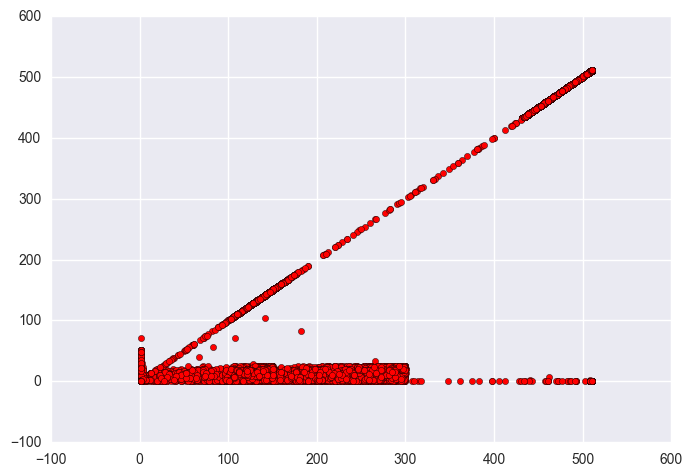

In [19]:
plt.scatter(train[target == 0]['cat_20'], train[target == 0]['cat_21'],c='red',marker='o',label=0)
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [21]:
sc.fit(train[['cat_20','cat_21']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
aa = sc.transform(train[['cat_20','cat_21']])

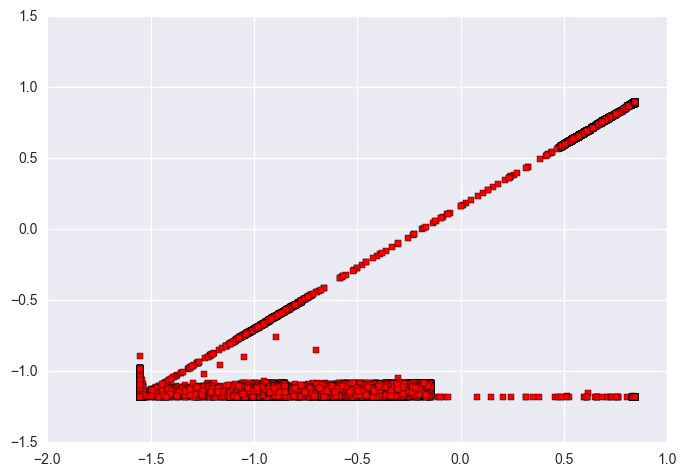

In [29]:
plt.scatter(aa[target == 0, 0], aa[target == 0, 1], c='red', marker='s', label=0)
plt.scatter(aa[target == 1, 0], aa[target == 1, 1], c='lightgreen', marker='x', label=1)
plt.scatter(aa[target == 2, 0], aa[target == 2, 1], c='blue', marker='v', label=0)
plt.show()

In [7]:
train_std = scaler.fit_transform(train_data_in_float)
test_std = scaler.fit_transform(test_data_in_float)

In [7]:
cov_mat = np.cov(train_std.T)

In [8]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [9]:
eig_vals

array([  9.70164920e+00,   4.67337122e+00,   3.79538756e+00,
         3.40162436e+00,   1.76148101e+00,   1.52930291e+00,
         1.13716718e+00,   1.11421909e+00,   6.62214803e-01,
         7.33284803e-01,   7.45353084e-01,   8.58587558e-01,
         1.02091238e+00,   9.63020550e-01,   9.78939525e-01,
         9.86112557e-01,   1.00308738e+00,   1.00113676e+00,
         1.00011102e+00,   9.99948797e-01,   4.33911931e-01,
         3.62073901e-01,   3.46983152e-01,   2.47239422e-01,
         1.70417438e-01,   1.36871051e-01,   7.98033091e-02,
         4.91979044e-02,   3.00436116e-02,   1.63027125e-02,
         1.47516008e-02,   1.51219793e-02,   8.51884548e-03,
         6.52065299e-03,   5.90961761e-03,   4.68521082e-03,
         3.66883036e-04,   1.03376404e-03,   2.02078877e-03,
         1.55074169e-03,   0.00000000e+00])

In [11]:
eig_vecs

array([[ -1.46545743e-02,   2.59345981e-02,   4.37546811e-03, ...,
          1.58903360e-03,   1.00514978e-03,   0.00000000e+00],
       [  1.81730052e-03,   4.14564873e-03,  -7.96942943e-03, ...,
          1.11108265e-05,  -3.08759933e-04,   0.00000000e+00],
       [  1.18379310e-04,   1.26682890e-02,  -2.77163608e-02, ...,
          9.44315915e-05,   1.02972888e-06,   0.00000000e+00],
       ..., 
       [  2.58636604e-01,  -1.55757764e-01,   2.15775537e-01, ...,
          6.62059090e-03,  -4.16637529e-03,   0.00000000e+00],
       [  6.22316878e-03,  -2.38478361e-01,   3.08961140e-01, ...,
         -2.40281763e-03,   1.41265328e-03,   0.00000000e+00],
       [  3.03514912e-01,   8.08970947e-03,  -5.50720555e-02, ...,
         -4.54422214e-03,   1.93076406e-03,   0.00000000e+00]])

In [12]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [13]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
9.7016491959
4.67337121665
3.79538755568
3.40162435968
1.76148101465
1.52930291468
1.13716717623
1.11421908631
1.02091237881
1.00308738189
1.00113675935
1.00011102498
0.99994879713
0.986112556754
0.978939524997
0.963020549587
0.858587557785
0.745353084299
0.733284803116
0.662214802522
0.433911930588
0.362073900946
0.346983152387
0.247239422321
0.170417437972
0.136871051353
0.0798033090956
0.0491979043767
0.0300436115576
0.0163027124644
0.0151219793122
0.014751600814
0.00851884548088
0.00652065298527
0.00590961761264
0.0046852108245
0.00202078876571
0.00155074168671
0.00103376403619
0.000366883036171
0.0


In [23]:
import plotly
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
plotly.offline.init_notebook_mode(connected=True)

In [24]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,42)],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,42)], 
        y=cum_var_exp,
        name='cumulative explained variance')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=25)
Y_sklearn = sklearn_pca.fit_transform(train_std)
test_sklearn = sklearn_pca.fit_transform(test_std)

In [55]:
Y_sklearn.shape

(169307, 12)

In [56]:
test_sklearn.shape

(91166, 12)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(Y_sklearn, target, test_size=0.2, stratify=target,random_state=2017)

In [57]:
lgbclassifier = LGBMClassifier(random_state=2017, n_jobs=4)

# lgbclassifier.fit(X_train,y_train)
# pred_lgb = lgbclassifier.predict(X_test)
# acc_lgb = accuracy_score(y_test,pred_lgb)
# print acc_lgb
# 0.77951686256

lgbclassifier.fit(Y_sklearn,target)
pred3 = lgbclassifier.predict(test_sklearn)  # 0.64736

In [58]:
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred3
sub['target'] = sub['target'].astype(int)
sub.to_csv('sub5.csv', index=False)

In [8]:
import os
import tensorflow as tf
import keras
from tensorflow.contrib.tensorboard.plugins import projector

Using TensorFlow backend.


In [36]:
LOG_DIR = 'logs'
metadata = os.path.join(LOG_DIR, 'metadata.tsv')

In [37]:
images = tf.Variable(train[predictor_variables].values, name='images')

In [38]:
with open(metadata, 'w') as metadata_file:
    for row in target.values:
        metadata_file.write('%d\n' % row)

In [39]:
with tf.Session() as sess:
    saver = tf.train.Saver([images])

    sess.run(images.initializer)
    saver.save(sess, os.path.join(LOG_DIR, 'images.ckpt'))
    
    config = projector.ProjectorConfig()
    # One can add multiple embeddings.
    embedding = config.embeddings.add()
    embedding.tensor_name = images.name
    # Link this tensor to its metadata file (e.g. labels).
    embedding.metadata_path = metadata
    # Saves a config file that TensorBoard will read during startup.
    projector.visualize_embeddings(tf.summary.FileWriter(LOG_DIR), config)

In [14]:
os.getcwd()

'/Users/hemanth/Datasets/PredictNetworkAttacks'

In [ ]:
# tensorboard --logdir=/Users/hemanth/Datasets/PredictNetworkAttacks/logs --port=6006

In [7]:
X_train_std = scaler.fit_transform(X_train_f)
X_test_std = scaler.fit_transform(X_test_f)

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [64]:
# define variables
input_num_units = 41
hidden1_num_units = 20
hidden2_num_units = 20
hidden3_num_units = 20
hidden4_num_units = 20
hidden5_num_units = 20
output_num_units = 3

epochs = 50
batch_size = 100

In [65]:
# Create model
model = Sequential([
        Dense(output_dim = hidden1_num_units, input_dim = input_num_units, activation='relu'),
        Dropout(0.2),
        Dense(output_dim = hidden2_num_units, input_dim = hidden1_num_units, activation='relu'),
        Dropout(0.2),
        Dense(output_dim = hidden3_num_units, input_dim = hidden2_num_units, activation='relu'),
        Dropout(0.2),
        Dense(output_dim = hidden4_num_units, input_dim = hidden3_num_units, activation='relu'),
        Dropout(0.2),
        Dense(output_dim = hidden5_num_units, input_dim = hidden4_num_units, activation='relu'),
        Dropout(0.2),
        Dense(output_dim = output_num_units, input_dim = hidden5_num_units, activation='softmax')
    ])

In [66]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
# Train model
trained_model = model.fit(X_train_std, y_train_f, nb_epoch=epochs, batch_size=batch_size, 
                          validation_data=(X_test_std, y_test_f))

Train on 135445 samples, validate on 33862 samples
Epoch 1/50
135445/135445 [==============================] - 10s - loss: 0.5566 - acc: 0.7649 - val_loss: 0.4928 - val_acc: 0.7778
Epoch 2/50
135445/135445 [==============================] - 9s - loss: 0.5020 - acc: 0.7764 - val_loss: 0.4900 - val_acc: 0.7781
Epoch 3/50
135445/135445 [==============================] - 10s - loss: 0.4967 - acc: 0.7771 - val_loss: 0.4866 - val_acc: 0.7786
Epoch 4/50
135445/135445 [==============================] - 9s - loss: 0.4926 - acc: 0.7776 - val_loss: 0.4847 - val_acc: 0.7787
Epoch 5/50
135445/135445 [==============================] - 9s - loss: 0.4898 - acc: 0.7780 - val_loss: 0.4836 - val_acc: 0.7788
Epoch 6/50
135445/135445 [==============================] - 10s - loss: 0.4879 - acc: 0.7782 - val_loss: 0.4827 - val_acc: 0.7790
Epoch 7/50
135445/135445 [==============================] - 9s - loss: 0.4864 - acc: 0.7782 - val_loss: 0.4816 - val_acc: 0.7792
Epoch 8/50
135445/135445 [=================